 <h1 align="center">SVM (Support Vector Machine)</h1>

## Introduction
In this project, we will explore the Support Vector Machine (SVM) algorithm with the Breast Cancer Dataset. The objective of this dataset is to predict whether a breast tumor is malignant or benign based on the features of the biopsy image.

Just like other algorithms in machine learning that perform the task of classification(decision trees, random forest, K-NN) and regression, Support Vector Machine or SVM one such algorithm in the entire pool. It is a supervised (requires labeled data sets) machine learning algorithm that is used for problems related to either classification or regression.

However, it is frequently applied in classification problems. SVM algorithm entails plotting of each data item as a point. The plotting is done in an n-dimensional space where n is the number of features of a particular data. Then, classification is carried out by finding the most suitable hyperplane that separates the two(or more) classes effectively. 

Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier. SVM maps training examples to points in space so as to maximise the width of the gap between the two categories.
### Types of SVM:
#### Linear SVM:<br>
<p> Linear SVM is used for data that are linearly separable i.e. for a dataset that can be categorized into two categories by utilizing a single straight line. Such data points are termed as linearly separable data, and the classifier is used described as a Linear SVM classifier.</p>


![Linear SVM](Media/linearSVM.png)
<h6 align="center"> Fig: Linear SVM</h6>

#### Non-Linear SVM:<br>
<p> Non-Linear SVM is used for data that are non-linearly separable data i.e. a straight line cannot be used to classify the dataset. For this, we use something known as a kernel trick that sets data points in a higher dimension where they can be separated using planes or other mathematical functions. Such data points are termed as non-linear data, and the classifier used is termed as a Non-linear SVM classifier.</p>

![Non-Linear SVM](Media/nonLinSVM.png)
<h6 align="center"> Fig: NON-Linear SVM</h6>

## Problem Statement:
Breast cancer is one of the most common forms of cancer affecting women worldwide. Early detection and accurate diagnosis are crucial for effective treatment and improved patient outcomes. Machine learning techniques, such as Support Vector Machines (SVM), have shown promise in classifying breast cancer cases as either malignant or benign based on features extracted from medical images and other diagnostic tests.
## Objective:
Develop a predictive model using SVM to classify breast tumors as malignant or benign based on a set of features extracted from diagnostic tests.
## Dataset
Breast cancer wisconsin (diagnostic) dataset

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets: \
https://goo.gl/U2Uwz2

### Loading the required libraries
The libraries imported are the dataset, pandas, seaborn, matplotlib and numpy

In [194]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [195]:
#loading the dataset from the sklearn datasets
dataset=load_breast_cancer()

In [196]:
#The full description of the dataset.
print(dataset["DESCR"])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [197]:
#the keys of the datasets
dataset.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

Breast Cancer Dataset contains 30  features to classify breast cancer. For this project we are only using 5 parameters

In [198]:
df=pd.DataFrame(dataset["data"][:,:5],columns=dataset["feature_names"][:5])
df["diagnosis"]=1-dataset["target"]
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,1
1,20.57,17.77,132.90,1326.0,0.08474,1
2,19.69,21.25,130.00,1203.0,0.10960,1
3,11.42,20.38,77.58,386.1,0.14250,1
4,20.29,14.34,135.10,1297.0,0.10030,1


In [199]:
df.diagnosis.value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

From the discription of dataset, 1 is classified as Benign and 0 as Malignant.

Where, malignant is cancerous and benign is non-cancerous i.e. 1 is classifies as not cancerous and 0 as cancerous.

We are using SVM to predict breast cancer. So we want, cancerous to be 1 and non cancerous be 0. 

Hence, we coverted target value such that 0 is Benign and 1 is Malignant

## Data Plot in 2D

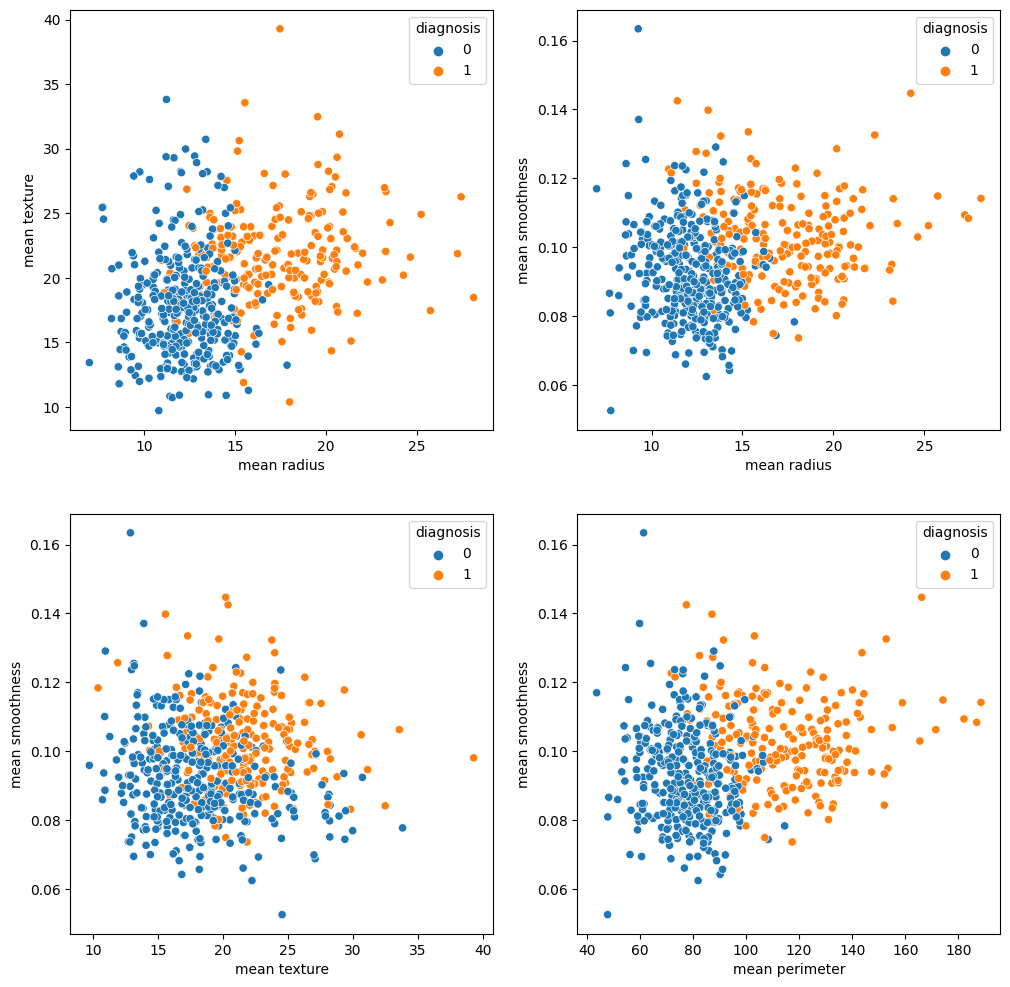

In [200]:
fig,axes=plt.subplots(2,2,figsize=(12,12))
sb.scatterplot(ax=axes[0,0],x="mean radius",y="mean texture",data=df,hue="diagnosis")
sb.scatterplot(ax=axes[0,1],x="mean radius",y="mean smoothness",data=df,hue="diagnosis")
sb.scatterplot(ax=axes[1,0],x="mean texture",y="mean smoothness",data=df,hue="diagnosis")
sb.scatterplot(ax=axes[1,1],x="mean perimeter",y="mean smoothness",data=df,hue="diagnosis")
plt.show()

Here,from above plots, it can be clearly seen that mean teture vs mean smoothness and mean perimeter or radius vs smoothness are more linear separated without overlapping. So,We classify Malignant or Benign Breast Cancer using 3 features: Mean texture, Mean Smoothness and Mean Perimeter

# Plots In 3d

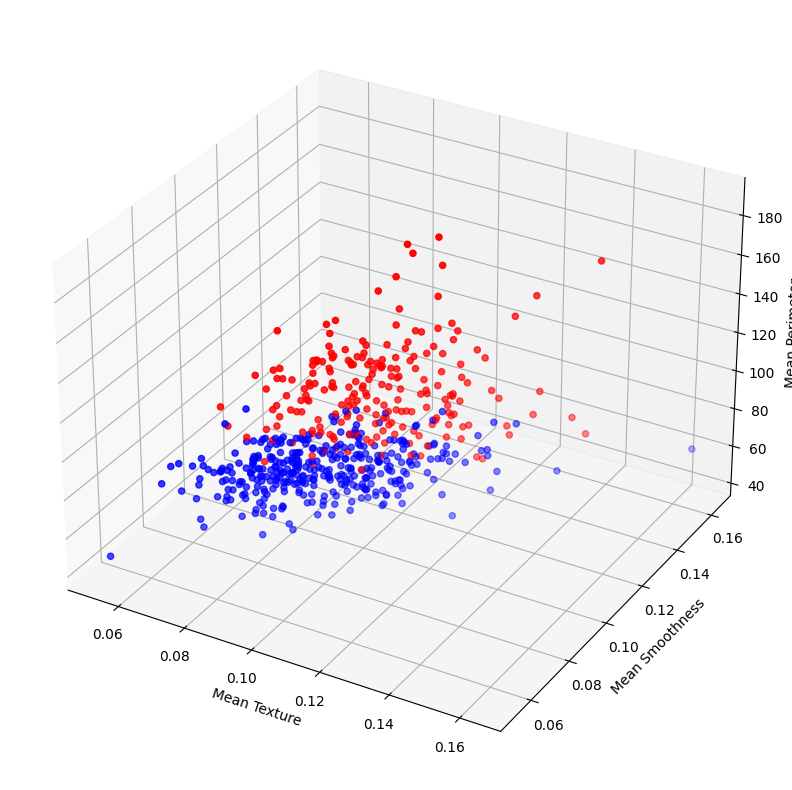

In [202]:
huemap={1:'r',0:'b'}# color red is Malignant and color Blue is Benign
plt.figure(figsize=(15,10))
ax=plt.axes(projection="3d")
ax.scatter(df["mean smoothness"].values,df["mean smoothness"],df["mean perimeter"],c=df["diagnosis"].map(huemap))
ax.set_xlabel("Mean Texture")
ax.set_ylabel("Mean Smoothness")
ax.set_zlabel("Mean Perimeter")
plt.show()

In [203]:
# Dropping other parameters
df.drop(["mean radius","mean area"],axis=1,inplace=True)

## Preparing and Splitting the dataset
The data set is split into training and testing set, here 70% of dataset is taken as train dataset and 30% is taken as testing dataset.

In [204]:
X=df.drop(["diagnosis"],axis=1).to_numpy()
Y=df["diagnosis"].to_numpy()
#Spliting to train set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=3)

In [205]:
print(X_train.shape)
print(X_test.shape)

(398, 3)
(171, 3)


In [206]:
from sklearn.preprocessing import StandardScaler
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Training SVM Model 
Here, the SVM model 'model' is trained with X_train, Y_train datasets with a linear kernel and regularization parameter c=1 with SVM.

In [207]:
from sklearn.svm import SVC

# Train the SVM model
model = SVC(kernel='linear', C=100)
model.fit(X_train, Y_train)

SVC(C=100, kernel='linear')

In [208]:
print("Support Vectors are ",model.support_vectors_)

Support Vectors are  [[ 2.79372008 -0.22994909 -0.37539031]
 [-0.10754601 -0.13236963  0.09884506]
 [ 0.51174417 -0.08909171 -0.49907316]
 [-0.21839173 -0.30711444  1.69894771]
 [ 0.37921125 -0.08990827 -0.14003953]
 [-0.00633906  0.20650466 -0.55420037]
 [ 1.28043511 -0.63700651  1.82616436]
 [-0.6593649   0.31061664  1.21835151]
 [-0.09067819 -0.18503804  0.68828217]
 [ 0.39848877 -0.34549297  1.11233764]
 [ 0.14547138  0.16567643 -0.72028877]
 [-0.62321956  0.08891936 -0.0177702 ]
 [-1.02804738  0.50332587 -0.19870053]
 [ 2.10213921  0.0235942  -1.09769814]
 [-0.93647918  0.15506109  1.09113487]
 [-0.05694254 -0.15809141  0.57520071]
 [ 1.93346095 -0.02417482  0.10803293]
 [ 1.17922815  0.10606722 -0.56692204]
 [ 1.38887113 -0.58637951  0.37024056]
 [ 0.33824653  0.01787825 -0.59731268]
 [-1.2521485   0.40942095 -0.22202358]
 [ 2.35997598 -0.38672948 -1.16837405]
 [-0.2015239   0.59723079 -0.06370954]
 [-0.95093732  0.08157028  0.13701005]
 [-0.35333434  0.1595522  -0.42203642]
 [-1

## Validation of the Solution
The accuracy score and classification report of the prediction and test cases are given as follows:

In [209]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate the performance of the model
Y_pred = model.predict(X_test)
accuracy = accuracy_score(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print('Accuracy:', accuracy)
print('Classification Report:\n', report)

Accuracy: 0.9590643274853801
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97       109
           1       0.97      0.92      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



## Prediction from the SVM model

In [225]:
Y_pred=model.predict(X_test)
Y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [210]:
df.head(5)

,mean texture,mean perimeter,mean smoothness,diagnosis
0,10.38,122.80,0.11840,1
1,17.77,132.90,0.08474,1
2,21.25,130.00,0.10960,1
3,20.38,77.58,0.14250,1
4,14.34,135.10,0.10030,1


## Visualization of the SVM hyperplane

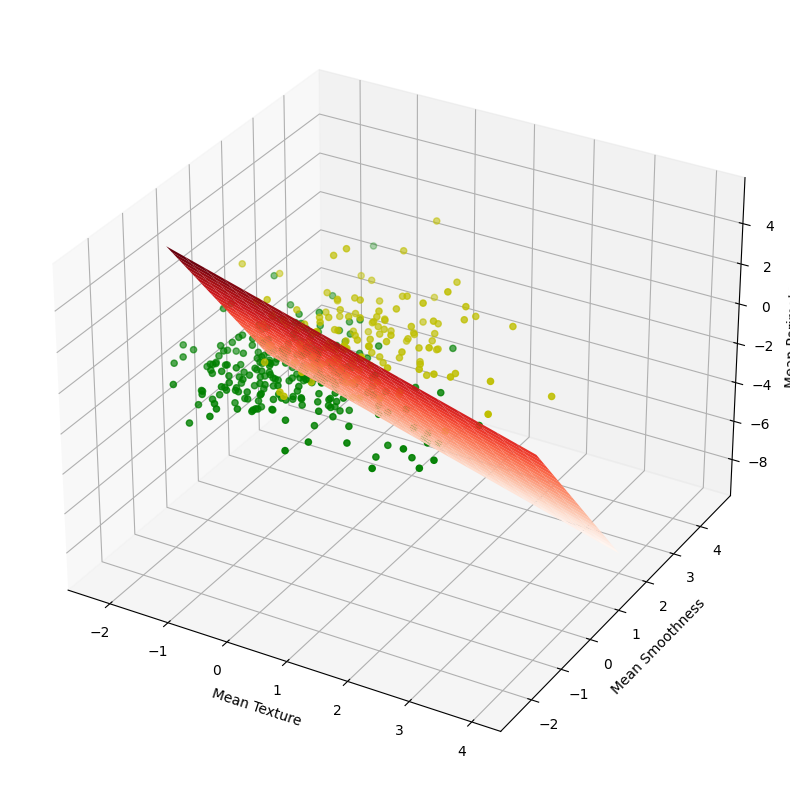

In [211]:
df_Y=pd.DataFrame(Y_train,columns=["diagnosis"])
huemap={1:'y',0:'g'}
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0],X_train[:,2],X_train[:,1],c=df_Y["diagnosis"].map(huemap))
ax.set_xlabel("Mean Texture")
ax.set_ylabel("Mean Smoothness")
ax.set_zlabel("Mean Perimeter")
zz = lambda xx,yy: (-model.intercept_[0]-model.coef_[0][0]*xx-model.coef_[0][1]*yy) / model.coef_[0][2]
tmpx = np.linspace(-2, 4, 20)
tmpy = np.linspace(-1, 2, 20)
xx,yy = np.meshgrid(tmpx,tmpy)
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')
plt.show()

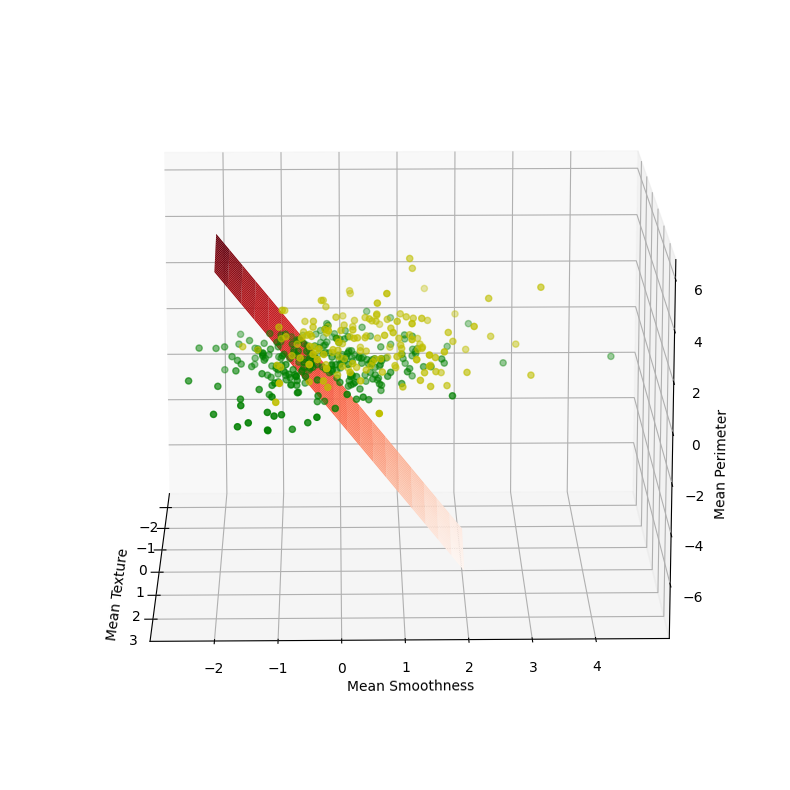

In [212]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0],X_train[:,2],X_train[:,1],c=df_Y["diagnosis"].map(huemap))
ax.set_xlabel("Mean Texture")
ax.set_ylabel("Mean Smoothness")
ax.set_zlabel("Mean Perimeter")
zz = lambda xx,yy: (-model.intercept_[0]-model.coef_[0][0]*xx-model.coef_[0][1]*yy) / model.coef_[0][2]
tmpx = np.linspace(1, 2, 20)
tmpy = np.linspace(-2, 2, 20)
xx,yy = np.meshgrid(tmpx,tmpy)
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')
for ii in range(0,360,1):
    ax.view_init(elev=15., azim=ii)

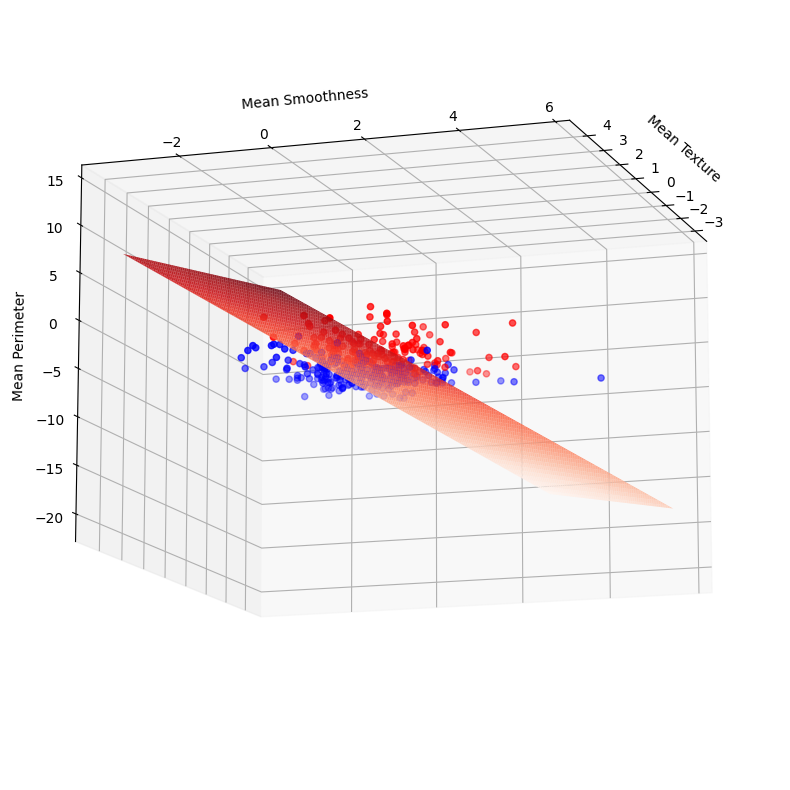

In [218]:
plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(X_train[:,0],X_train[:,2],X_train[:,1],c=df_Y["diagnosis"].map(huemap))
ax.set_xlabel("Mean Texture")
ax.set_ylabel("Mean Smoothness")
ax.set_zlabel("Mean Perimeter")
h = .02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

zz = lambda xx,yy: (-model.intercept_[0]-model.coef_[0][0]*xx-model.coef_[0][1]*yy) / model.coef_[0][2]
ax.plot_surface(xx, yy, zz(xx,yy), cmap='Reds')
for ii in range(0,20,1):
    ax.view_init(elev=-12, azim=ii)

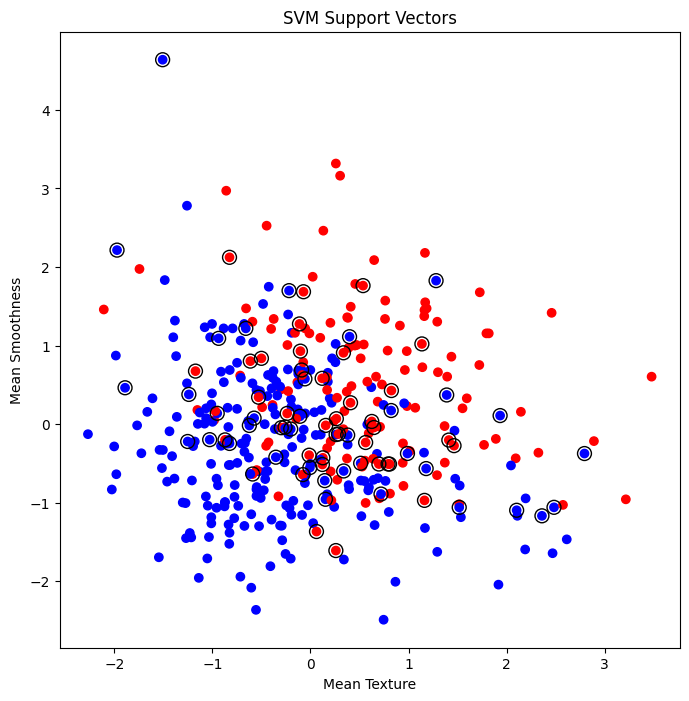

In [216]:
huemap={1:'r',0:'b'}# color red is Malignant and color Blue is Benign
plt.figure(figsize=(8,8))
plt.scatter(X_train[:, 0], X_train[:, 2], c=df_Y["diagnosis"].map(huemap))
ax = plt.gca()
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 2], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Mean Texture')
plt.ylabel('Mean Smoothness')
plt.title('SVM Support Vectors')
plt.show()

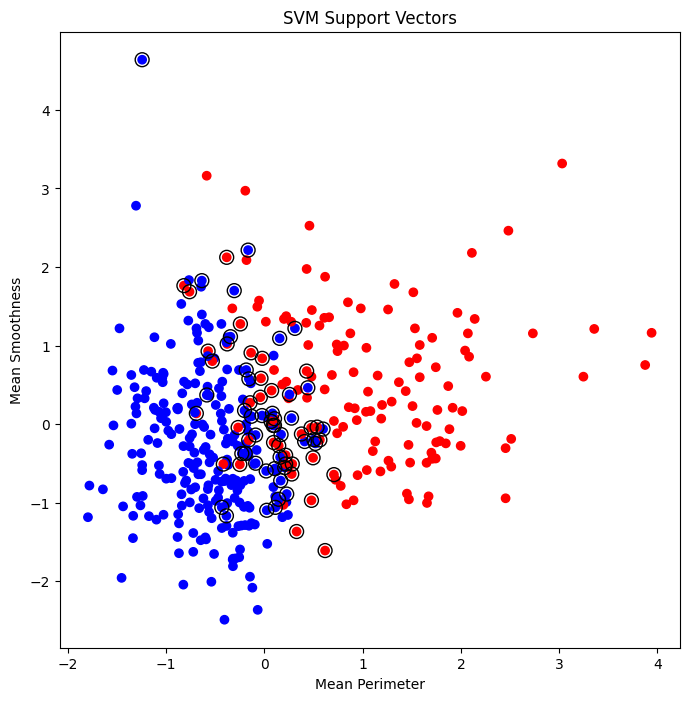

In [217]:
huemap={1:'r',0:'b'}# color red is Malignant and color Blue is Benign
plt.figure(figsize=(8,8))
plt.scatter(X_train[:,1], X_train[:, 2], c=df_Y["diagnosis"].map(huemap))
ax = plt.gca()
plt.scatter(model.support_vectors_[:, 1], model.support_vectors_[:, 2], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Mean Perimeter')
plt.ylabel('Mean Smoothness')
plt.title('SVM Support Vectors')
plt.show()

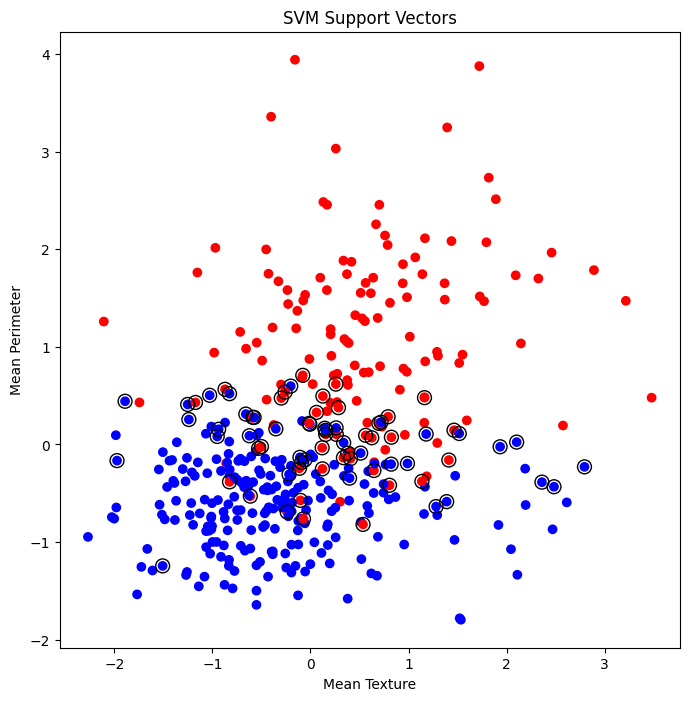

In [223]:
huemap={1:'r',0:'b'}# color red is Malignant and color Blue is Benign
plt.figure(figsize=(8,8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=df_Y["diagnosis"].map(huemap))
ax = plt.gca()
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k')
plt.xlabel('Mean Texture')
plt.ylabel('Mean Perimeter')
plt.title('SVM Support Vectors')
plt.show()

# Confusion Matrix

In [228]:
from sklearn.metrics import confusion_matrix
confusion_mat=confusion_matrix(Y_test,Y_pred)
confusion_mat

array([[107,   2],
       [  5,  57]])

## Conclusion
In , this way ...

## Submitted by
Devraj Parajuli (076EI013) \
Prayag Man Mane (076BEI027) \
Sanim Kumar Khatri (076BEI037) 